In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import SVC

#download and parse dataset
def split_data():
    dataset = pd.read_csv('data.csv', header=None).values
    occ_attr = dataset[:, 1:]
    occ_class = dataset[:, 0]
    occ_class = occ_class.astype(np.float)
    occ_attr = occ_attr.astype(np.float)
    return occ_attr, occ_class

def plotsDraw(X, y, svc, a):
    # create grid 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max),
    np.arange(y_min, y_max))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    a.contourf(xx, yy, Z, cmap=plt.cm.plasma, alpha=0.8) 
    a.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    
    # SVM call
def SVMUse(occ_attr, occ_class, kernel, C, gamma):
    data_train, data_test, class_train, class_test = train_test_split(occ_attr, occ_class, test_size=0.30, random_state=123)
    std_train_x, std_train_y = standard_transform(data_train, class_train)
    std_test_x, std_test_y = standard_transform(data_test, class_test)
    svc_train = SVC(kernel=kernel, C=C, gamma=gamma).fit(std_train_x, std_train_y)
    print('SVC: kernel = '+kernel+' C = '+str(C)+' gamma = '+str(gamma))
    pred_test = svc_train.predict(std_test_x)
    print('{:.2%}'.format(metrics.accuracy_score(std_test_y, pred_test)))
    print('\n')
    
    #scale data
def standard_transform(x, y):
    std_scale = preprocessing.StandardScaler().fit(x)
    x = std_scale.transform(x)
    return x[:, :2], y


In [ ]:
def main():
    occ_attr, occ_class = split_data()
    X, y = standard_transform(occ_attr, occ_class)
    
    #core function variation: linear & rbf
    f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
    for a,kernel in zip(ax, ('linear','rbf')):
        svc = SVC(kernel=kernel, C=1,gamma=0.1).fit(X, y)
        SVMUse(occ_attr, occ_class, kernel, 1, 0.1)
        plotsDraw(X, y, svc, a)
    ax[0].set_title('SVC Linear Kernel')
    ax[1].set_title('SVC RBF Kernel')
    plt.show()

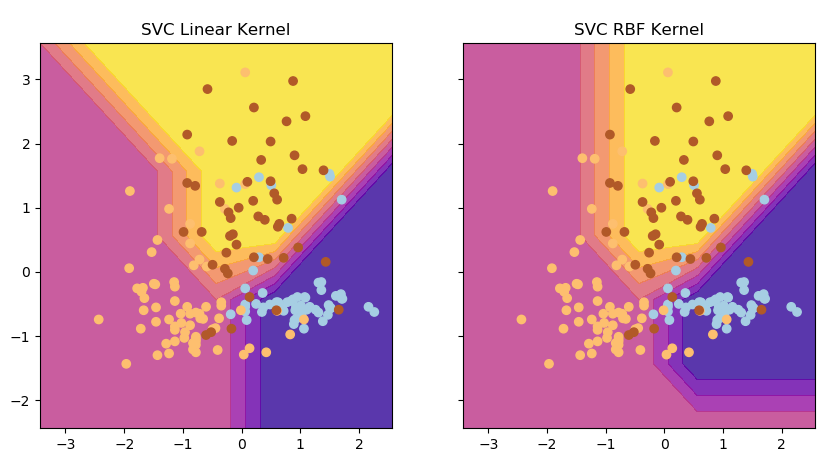

In [ ]:
 #regularization variation (C): 1, 10, 100, 1000
    f, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(15,5))
    for a,C in zip(ax, (1,10,100,1000)):
        svc = SVC(kernel='rbf', C=C,gamma=0.1).fit(X, y)
        SVMUse(occ_attr, occ_class, 'rbf', C, 0.1)
        plotsDraw(X, y, svc, a)
    ax[0].set_title('C = 1')
    ax[1].set_title('C = 10')
    ax[2].set_title('C = 100')
    ax[3].set_title('C = 1000')
    plt.show()
    


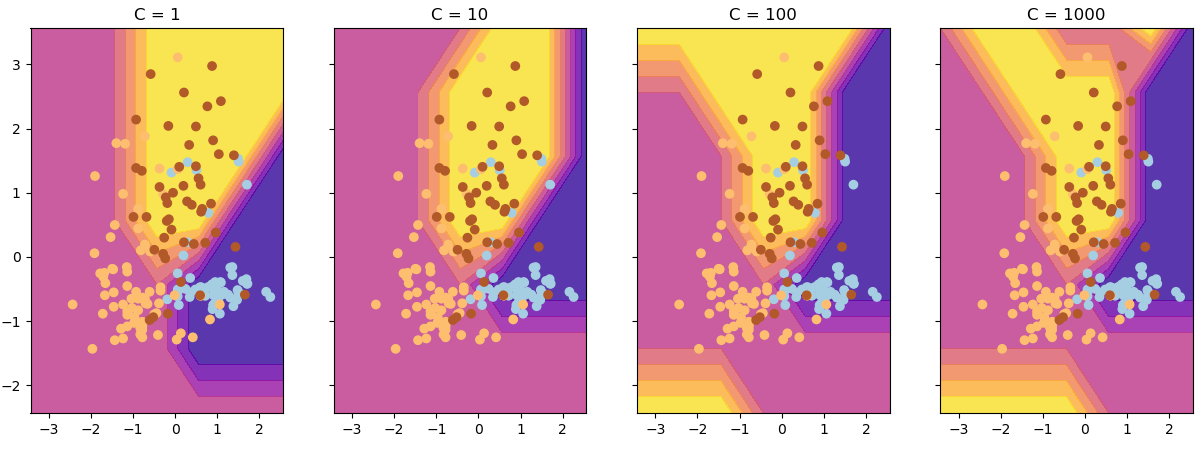

In [ ]:
    #core coefficient variation (gamma): 0.1, 10, 100, 1000
    f, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(15,5))
    for a,gamma in zip(ax, (0.1,10,100,1000)):
        svc = SVC(kernel='rbf', C=1,gamma=gamma).fit(X, y)
        SVMUse(occ_attr, occ_class, 'rbf', 1, gamma)
        plotsDraw(X, y, svc, a)
    ax[0].set_title('RBF gamma = 0.1')
    ax[1].set_title('RBF gamma = 10')
    ax[2].set_title('RBF gamma = 100')
    ax[3].set_title('RBF gamma = 1000')
    plt.show()
    
main()

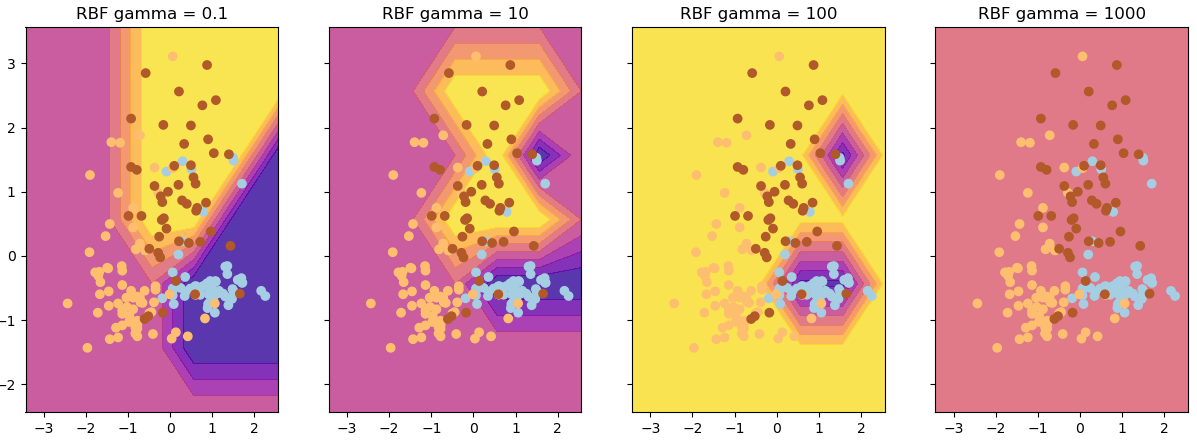